<a id='top'> </a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA for Titanic Dataset

In [2]:
# load in the "titanic" dataset, which comes preloaded with seaborn
df = sns.load_dataset("titanic")

In [3]:
# A good way to look at every row in your dataframe that contains nan values
nandf = df[df.isna().sum(axis=1)>0] 
nandf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


# Univariate Analysis (single variable analysis):

One of the first things we do when getting a new data set is too look how each of the variables is distributed. Analyzing how single features (variables,columns) are distributed is known as univariate analysis.

## sns.distplot() for numeric columns:

Unlike matplotlib seaborn is designed for tabular data such as dataframes. This allows us to create plots much more easily than matplotlib when dealing with this kind of data.

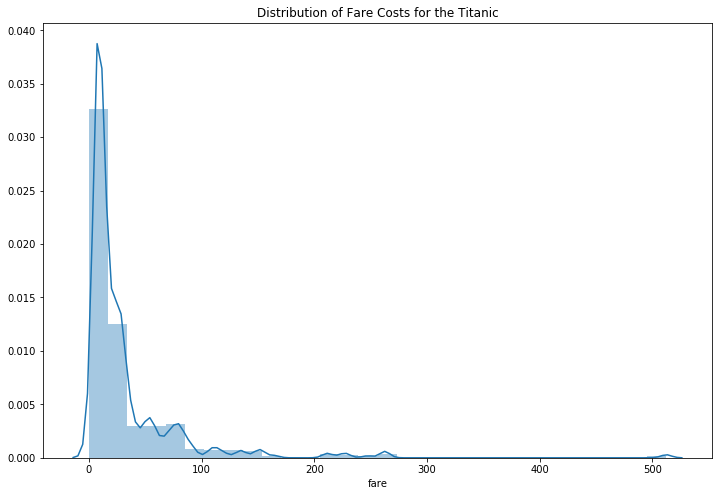

In [4]:
# Lets take a look at one of the numeric columns
fare = df['fare']
plt.figure(figsize=(12,8)) # we can specify the figure size with plt.figure(figsize=(x,y))
sns.distplot(fare,bins=30)
plt.title('Distribution of Fare Costs for the Titanic')
plt.show()

The fare column above shows that the data is skewed because a few customers payed much more than the general population. To get a better insight into the distribution of the data we can set an upper limit to eliminate these outliers

Text(0.5, 1.0, 'Distribution of Fare with Upper Limit 50')

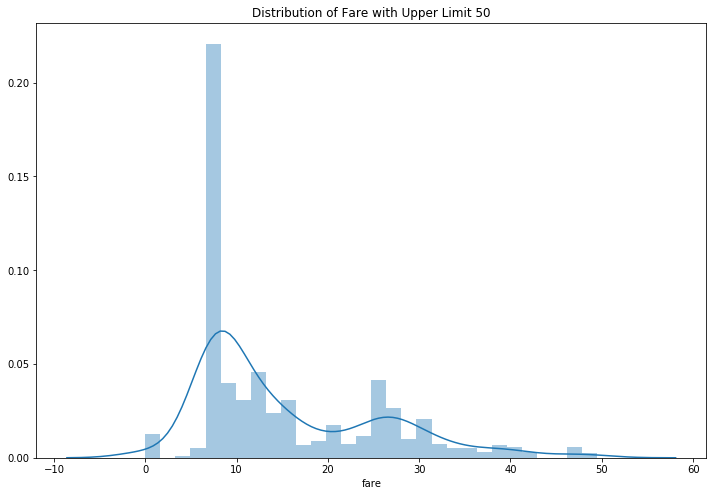

In [5]:
fare_with_limit = df[df['fare']<50]['fare']
plt.figure(figsize=(12,8))
sns.distplot(fare_with_limit,bins=30)
plt.title('Distribution of Fare with Upper Limit 50')

This gives us a much better view of the data and the distributions within it. The presence of outliers causes much of this distribution to be grouped into much fewer bins

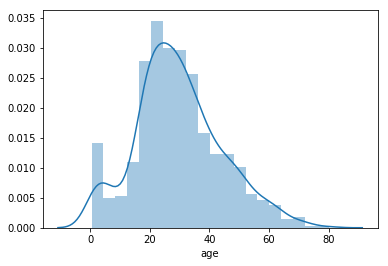

In [6]:
# next we try plotting the age column (this will give us an error if we do not drop NaNs before plotting)
sns.distplot(df['age'].dropna())

## sns.countplot() for categorical columns:

In [7]:
categorical_columns = ['survived','alive','alone','pclass','class','sex','embarked','embark_town','deck']

# We can iterate through our list of categorical columns and take a look at the values of each
for col in categorical_columns:
    print(col+':')
    print(df[col].unique(),'\n') # \n will add a line of white space to your print statement
    

survived:
[0 1] 

alive:
['no' 'yes'] 

alone:
[False  True] 

pclass:
[3 1 2] 

class:
[Third, First, Second]
Categories (3, object): [Third, First, Second] 

sex:
['male' 'female'] 

embarked:
['S' 'C' 'Q' nan] 

embark_town:
['Southampton' 'Cherbourg' 'Queenstown' nan] 

deck:
[NaN, C, E, G, D, A, B, F]
Categories (7, object): [C, E, G, D, A, B, F] 



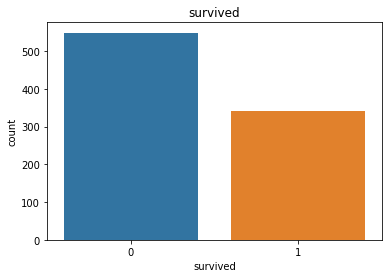

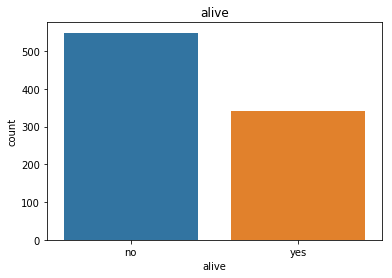

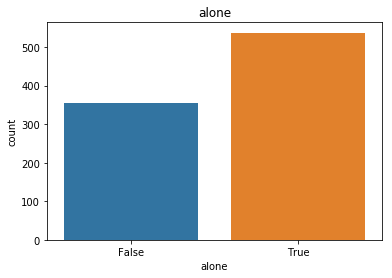

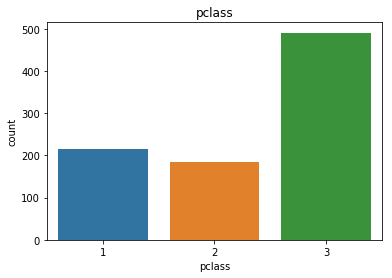

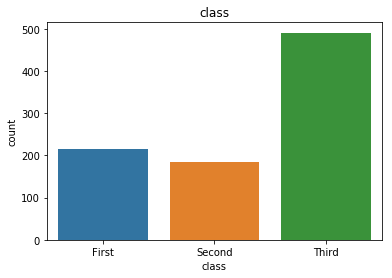

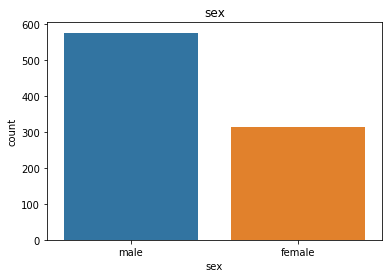

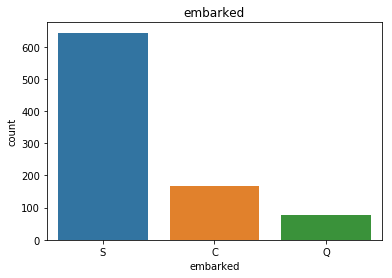

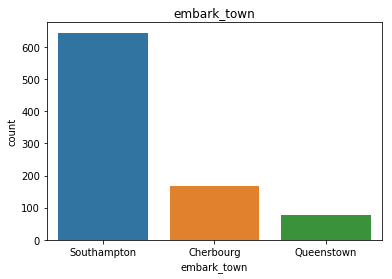

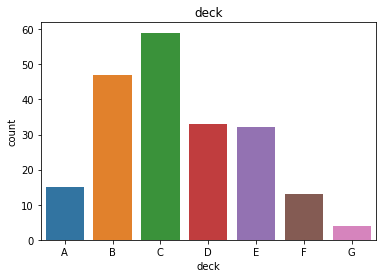

In [8]:
# Next we can loop through our categorical columns again and plot out the counts of each category
for column in categorical_columns:
    sns.countplot(x=column,data=df)
    plt.title(f'{column}')
    plt.show()

From these distribution we can see that a few columns are actually duplicates of each other. "pclass" shows the same thing as "class", "embarked" is the same as "embark_town" and "alive" is the same as "survived". After seeing the distributions we can be confident they are indeed duplicates and delete them without losing any information.

In [9]:
# If you try to run this cell again you will get an error as the .drop() function wont be able to find the columns
duplicates=['alive','class','embarked']
df.drop(columns = duplicates,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


# Dealing with NaNs

One of the most common ways to deal with Nans is to fill them with a central value of its respective feature column. For numeric columns this would generally be a median or a mean. Categorical columns with no obvious order are often filled with the mode. Before we fill nans however its good to look into the data set and see how the nans are distributed throughout the features.

In [10]:
# First we grab a list of all the columns in our dataframe that have Nans
nan_columns = [col for col in df.columns if df[col].isna().any()]

# Next we look at the total NaNs in each column that has Nans
total_nans_by_column = df[nan_columns].isna().sum().sort_values(ascending=False)
print('Total NaNs by Column:')
print(total_nans_by_column,'\n')

# We can convert these totals to percent by dividing by the total number of values in the dataframe
print('Percent NaNs by Column:')
print(total_nans_by_column/len(df)*100)

Total NaNs by Column:
deck           688
age            177
embark_town      2
dtype: int64 

Percent NaNs by Column:
deck           77.216611
age            19.865320
embark_town     0.224467
dtype: float64


We see that the 'deck' feature is missing more than 3/4 of its values so it may be worth dropping. The other columns however have much more information so they will likely be worth filling. Here is an example of two functions to fill a particular column in a data frame with a median or mode:

### Filling with Median for Numeric Columns:

In [11]:
# make a sample dataframe to try functions on
sdf = df.copy()

In [12]:
def fill_median(df,column_name):
    fill = df[column_name].median()
    df[column_name].fillna(fill,inplace=True)
    print(f"NaNs in {column_name} column filled with a median value of : {fill}")
    return

fill_median(sdf,'age')

NaNs in age column filled with a median value of : 28.0


### Filling with Mode for Categorical Columns

In [13]:
def fill_mode(df,column_name):
    fill = df[column_name].mode()[0]
    df[column_name].fillna(fill,inplace=True)
    print(f"NaNs in {column_name} column filled with mode: {fill}")
    return
fill_mode(sdf,'embark_town')

NaNs in embark_town column filled with mode: Southampton


### Grouping by a Particular Category

Sometimes we know that the distributions of our feature are affected by other categories. For this dataset we know that the average male is a few years older than the average female:

In [14]:
df.groupby('sex')['age'].mean().reset_index()

,sex,age
0,female,27.915709
1,male,30.726645


Knowing this we can add an extra layer of precision by filling missing age values with the mean age of each passengers respective gender. There are several ways to do this, but the best way is to take advantage of how pandas utilizes indices. Here is a function that fills missing nan values of a particular column with means broken down by a praticular category:

In [15]:
def fill_mean_by_category(df,nan_column,category):    
    means = df.groupby(category)[nan_column].mean()
    df.set_index([category],inplace=True)
    df[nan_column] = df[nan_column].fillna(means)
    df.reset_index(inplace=True)
    print(f"Filled NaNs in '{nan_column}' column with means of respective '{category}' category")
    return

fill_mean_by_category(df,'age','sex')

Filled NaNs in 'age' column with means of respective 'sex' category


---

[Back to Top](#top)